Quickstart tutorial
======

## Summary

This notebook provides the basics of the microeconomic, agent-type class which is fundamental for HARK.

____
### Structure:

- **Part 1**: basics of the perfect-foresight agent model
- **Part 2**: more advanced methods for the perfect-foresight agent model
- **Part 3**: basics of the idiosyncratic income shocks agent model

### Learning outcomes:
- **Part 1**:
    - Learn how to declare basic agent-type objects
    - Learn solution methods for the agent-type objects
    - Plot value function and consumption function
    - Learn how to simulate the agent-type objects
    - Plot value function
- **Part 2**:
    - Learn how to build life-cycle models
    - Learn more advanced simulation techniques
    - Learn advanced plots
____
## Introduction to the consumer problem

HARK AGentType classes were designed to solve the consumer problem. 

In the most basic formulation, the consumer problem is given as follows. The consumer lives T+1 periods (T $\leq \infty$) and during hers lifetime receive the same income $Y$. In each period t (0\leq t\leq T)  she can spent it on the consumption $C_t$ or invest $A_t$ with a risk free interest rate R. She maximize the lifetime utility, by solving the following Bellman equation defined on the "cash in hand" state space $M_t = C_t +A_t$:   

For $t<T+1$
\begin{eqnarray*}
V_t(M_t) &=& \max_{C_t} U(C_t) + \beta V_{t+1}(M_{t+1}), \\
& s.t. & \\
A_t &=& M_t - C_t, \\
M_{t+1} &=& R (M_{t}-C_{t}) + Y, \\
\end{eqnarray*}
for $t \geq T+1$
\begin{eqnarray*}
V_t(M_t) &=& 0
\end{eqnarray*}

Where $\beta <1 $ is a discount factor and $U(C)$ is a standard CRRA utility function:
$$
U(C)=\frac{C^{1-\rho}}{1-\rho}
$$


## Why start with perfect foresight model: HARK class structure
<img style="float: right;" src="HARK_diagram.png" width="200" height="300">

Obviously, HARK was designed to solve much more complicated consumer problems. However, it was written in the object programing paradigma (OPP). Thus, the class designed to solve such basic problem: **PerfForesightConsumerType** is then a foundation (parent/subclass in the OPP language) for the more advanced classes with the heterogeneous agents. In the diagram you can observe the inheritance between some of the HARK Agent-type classes:   


As you can observe, the **AgentType** superclass is the most general; type of framework for the microeconomic models implemented in HARK. The child/subclass of **AgentType** is **PerfForesightConsumerType**, for which you need to define parameters (**attributes** in OPP): $T$, $\beta$... Next, there are classes with the heterogeneous agents for which you need to *additionally* define parameters of the income process/ aggregate shocks etc. Moreover, **methods** (thus the way how the object is created, how the solution is presented)of the subclasses are a the same or modified methods of the parent class.

Therefore, to master the basics of HARK microclass you firstly need to understand **PerfForesightConsumerType** class. Consequently, this tutorial firstly show how to deal with it, however the majority of the presented methods is general for the HARK agent-type objects (though it may involve assigning more parameters). In the last sections, the class **IndShockConsumerType** with idiosyncratic income shocks will be presented.  


# Part I: Basics of the perfect foresight model

In this part, you learn basics of the perfect foresight model. We will solve the example of the consumer problem presented in the introduction. 

## Getting started
Firsty, you need to import HARK and a few additional libraries. Importantly, to use PerfForesightConsumerType you also need to import HARK.ConsumptionSaving.ConsIndShockModel sublibrary. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import HARK 

from copy import deepcopy
from HARK.ConsumptionSaving.ConsIndShockModel import *
from HARK.utilities import plotFuncsDer, plotFuncs              

## Agent-type object creation 
The most basic way of creating HARK object is to call constructor (in OPP method which create the object, called by the class name). 

For **PerfForesightConsumerType** we need to set:
- $T+1$: a consumer's lifespan, called **cycles** in the code, if $T= \infty$, set **cycles**=0.  
- $\beta$: a discount factor, **DiscFac** in the code.
- $\rho$: CRRA utility function parameter, **CRRA** in the code.  

Additionally, you need to define two parameters which does not occur in the presented example, however can be useful:

- Probability of surviving to the next period, called **LivPrb** in the code. 
- Income $Y$ growth factor, **PermGroFac** in the code.

We call our first HARK object **Example_agent_1** and set the example values of the parameters.  

In [2]:
Example_agent_1 = PerfForesightConsumerType(cycles=0,

CRRA = 2.0, Rfree = 1.03, DiscFac = 0.99,

LivPrb = 1.0,

PermGroFac = 1.0)


Because we did not assume growth in 𝑌 or survival  uncertainty , we set these values to 1.

The second method involves creating a **dictionary**: a list of parameters' names and values. Here we define the dictionary with the same values as in the first example.   

In [3]:
First_dictionary = {
    'CRRA' : 2.0,
    'DiscFac' : 0.99,
    'Rfree' : 1.03,
    'cycles' : 0,
    'LivPrb' : [1.00],
    'PermGroFac' : [1.00],
}

To create object with a dictionary, use the constructor with the previously defined dictionary as an argument: 


In [4]:
Example_agent_2 = PerfForesightConsumerType(**First_dictionary)

Although, the first method is easier, we recommend to define a dictionary every time when you create an HARK object. Firstly, it makes your code cleaner. Secondly, it enables you to create multiple objects with the same dictionary (what will be important when it comes to creating a macro classes). 


The presented here methods work also for the more sophisticated HARK object (however you will need to specify more parameters). 

### Creating agent-type object by copy

Once creating agent-type object, you can use its set of parameters to create another. To do so you need to use **deepcopy** method from copy package.   

In [5]:
Example_agent_3 = deepcopy(Example_agent_2)

**Do not** use an assignment operator (=) because it does not create new object. For example a command: 

In [6]:
Example_agent_4 = Example_agent_2

does not create a new object, it only gives a new name to the object Example_agent_2 (this object simply gets two names: Example_agent_2, Example_agent_4)

### Modifying   parameter values 

You can easily change the parameter value of the object by "." operator. 

For example, to change the discount factor value of the object created in the previous subsection:


In [7]:
Example_agent_3.DiscFac = 0.95

## Solving an agent-type problems

To solve agent type problem presented in the example, you need to find a **value function** from the Bellman equations and **the policy functions**. In our case, the only policy function is a consumption function: a function that for each age t and cash-in-hand $M_t$, specify the optimal consumption level: $c_t(M_t)$.

To solve a model in HARK, you need to use **solve** method. For example if we want to solve the model with parameters of the object Example_agent_2: 


In [8]:
Example_agent_2.solve()


### Solution elements

Solve method finds value function and consumption function for each period t of the consumer's life (in case of the infinite T, it specify only one set of functions, because all the parameters are stable and lifespan is always infinite, the functions are the same, no matter of t). Besides consumption and value functions, solve method create also a few attributes, the most important is minimal cash-in-hand value for which the problem has a solution. 

The exact name of these attributes in HARK are:

- vFunc: value function
- cFunc: consumption function
- mNrmMin: Minimum value of $M_t$ such that cFunc and vFunc are defined.

To get an access to the value/consumption function you need to specify the period t and the object name, using two times . operator. So to get access to the value function, consumption function and mNrmMin for the solved example:



In [9]:
Example_agent_2.solution[0].vFunc
Example_agent_2.solution[0].cFunc
Example_agent_2.solution[0].mNrmMin


-33.33330059492335

As you can see, only mNrmMin can be printed as a value. However, value and consumption functions can be plotted.


### Ploting the solution

After **solve** method is used, the value and policy functions can be plotted. HARK dedicated function for doing so is **plotFuncs**. As an arguments you need to give a function from the solution (possible a few functions) and the limits of interval for which you want to make a plot. 

For example, we can plot consumption and value functions on the interval from mNrmMin to -mNrmMin.


Consumption function


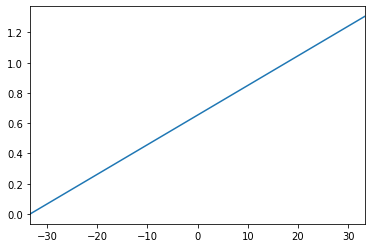

Value function


c:\users\janro\desktop\econark_work\econ-ark\lib\site-packages\HARK\utilities.py:141: RuntimeWarning: divide by zero encountered in reciprocal
  return( c**(1.0 - gam) / (1.0 - gam) )


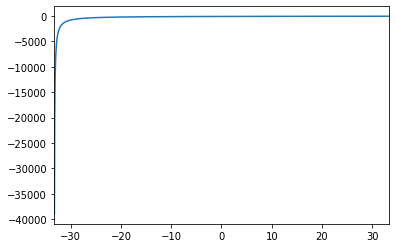

In [10]:
min_v = Example_agent_2.solution[0].mNrmMin
max_v = -Example_agent_2.solution[0].mNrmMin
print("Consumption function")
plotFuncs([Example_agent_2.solution[0].cFunc],min_v,max_v)
print("Value function")
plotFuncs([Example_agent_2.solution[0].vFunc],min_v,max_v)

## Simulation

Next step is to simulate the the agent behavior. To do so, you firstly need to set a few parameters for the sake of the simulation:

- **AgentCount**: number of simulated agents
- **T_cycle**: logical parameter which govern the time flow during the simulation (if it is moving forward or backward)
- **T_sim**: number of simulation periods
- **T_age**: Age after which simulated agents are automatically killed

Moreover, HARK enables to simulate model with the log-normal distributions of the initial assets and incomes. You need to set the parameters:

- **aNrmInitMean**: Mean of log initial assets
- **aNrmInitStd**: Standard deviation of log initial assets
- **pLvlInitMean**: Mean of log initial permanent income
- **pLvlInitStd**: Standard deviation of log initial permanent income

Lastly, using HARK agent type class, you can also set the aggregate income increase (so the rate of the income increase common to all agents). You set then a parameter:

- **PermGroFacAgg**: Aggregate permanent income growth factor

In our example, we simulate 1 agent, as it is a representative agent model. A time flow is chronological, there is no initial heterogeneity  , thus std of the initial assets and income distributions are set to 0. The initial assets and income are set to 1.0. There is no aggregate income increase, so we set income growth factor to 1. We simulate 1000 periods,and assume infinitely lived agent. 

To declare this parameters values, we create a new dictionary:  

In [11]:
Simulation_dictionary = {  'AgentCount': 1,
                           'aNrmInitMean' : 0.0,
                           'aNrmInitStd' : 0.0,
                           'pLvlInitMean' : 0.0,
                           'pLvlInitStd' : 0.0,
                           'PermGroFacAgg' : 1.0,
                           'T_cycle' : 1,
                           'T_sim' : 1000,
                           'T_age' : None  
                          }


Next, you need to update the object. To do so we use **setattr** function, which add parameter's values to the object.

In [12]:
for key,value in Simulation_dictionary.items():
    setattr(Example_agent_2,key,value)

Finally, you can start our simulation. Firstly, you need to decide which variables you want to track, we choose an assets level and consumption level, in code they are called: **aNrmNow** and **cNrmNow**. Next, you need to initialize the simulation by **initializeSim** method. Lastly, run the simulation by **simulate()** method. 

In [13]:
Example_agent_2.track_vars = ['aNrmNow','cNrmNow']
Example_agent_2.initializeSim()
Example_agent_2.simulate()

## Plotting the simulation

Plotting the simulation is a little bit more complicated than plotting the solution, as you cannot use a dedicated function. Instead, use **matplot** library. 

To see the the consumption and asset history, use objects created by simulation, which contains history of every agent, in each of the simulation periods. They are call the same as the tracked variables with a \_hist ending. Thus the history of assets and consumption are called **aNrmNow_hist** and **cNrmNow_hist**. 

Let's make a plot of the assets level and consumption level during the simulated periods. Firstly, define the vectors of mean assets and consumption. Here, there is only one consumer, so we do not need to use mean function, which we write here. However, if you want to plot mean asset/consumption level for many agents, you need to use this method. 

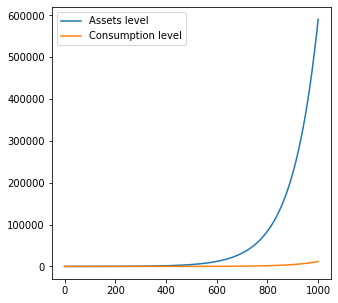

In [14]:
periods= np.linspace(0,1000,1000)
asset_level = np.mean(Example_agent_2.aNrmNow_hist[0:1000], axis = 1)
cons_level = np.mean(Example_agent_2.cNrmNow_hist[0:1000], axis = 1)

plt.figure(figsize=(5,5))
plt.plot(periods,asset_level,label='Assets level')
plt.plot(periods,cons_level,label='Consumption level')
plt.legend(loc=2)
plt.show()



Now, let's plot the mean asset and consumption increase: 

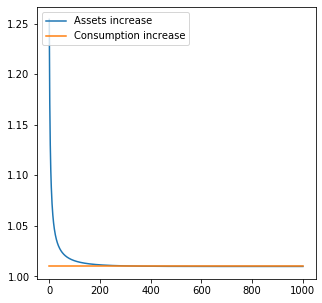

In [15]:
increase_assets = asset_level[1:1000]/asset_level[0:999] 
increase_cons = cons_level[1:1000]/cons_level[0:999] 
plt.figure(figsize=(5,5))
plt.plot(periods[1:1000],increase_assets, label='Assets increase' )
plt.plot(periods[1:1000],increase_cons,label='Consumption increase')
plt.legend(loc=2)
plt.show()

## Exercise

Congratulations! You've just learned the basics of the agent-type class in HARK. It is time for some exercises:

### Exercise 1: create the agent-type object

Define a dictionary and then use it to create the agent-type object with the parameters:

- $\beta = 0.96$
- $\rho = 2.0$
- $T = \infty$
- Risk free interest rate $R= 1.05$
Assume no survival uncertainty  and income growth factor 1.01

    

In [16]:
#Write your solution here

# fill the dictionary and then use it to create the object

#First_dictionary = {
#    'CRRA' : ,
#    'DiscFac' : ,
#    'Rfree' : ,
#    'cycles' : ,
#    'LivPrb' : [],
#    'PermGroFac' : [],
#}
#Exercise_agent = 

In [17]:
#Solution
First_dictionary = {
    'CRRA' : 2.0,
    'DiscFac' : 0.96,
    'Rfree' : 1.05,
    'cycles' : 0,
    'LivPrb' : [1.0],
    'PermGroFac' : [1.0],
}
Exercise_agent = PerfForesightConsumerType(**First_dictionary)

### Exercise 2: Solve the model and plot the value function



In [18]:
#Write your solution here, use methods from "solving the model" subsection

Value function


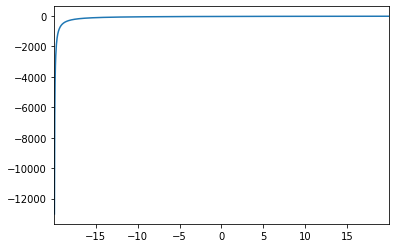

In [19]:
#Solution
Exercise_agent.solve()

min_v = Exercise_agent.solution[0].mNrmMin
max_v = -Exercise_agent.solution[0].mNrmMin
print("Value function")
plotFuncs([Exercise_agent.solution[0].vFunc],min_v,max_v)

### Exercise 3: Prepare the simulation

Next prepare the simulation. Assume that **there exsists the initial assets and income heterogenity**. Assume, the initial income and assets distributions are log-normal, have mean 1 and std =1. Simulate 1000 agents for 1000 periods.   

Add the new parameters to the object:

In [20]:
#Write your solution here. 

#Fill the dictionary
#Simulation_dictionary = {  'AgentCount': ,
#                           'aNrmInitMean' : ,
#                           'aNrmInitStd' : ,
#                           'pLvlInitMean' : ,
#                           'pLvlInitStd' : ,
#                           'PermGroFacAgg' : 1.0, #assume no income aggregate growth
#                           'T_cycle' : 1, #assume forward time flow
#                           'T_sim' : , 
#                           'T_age' : None #assume immortal agents  
#                          }

#for key,value in Simulation_dictionary.items():
#    setattr(Exercise_agent,key,value)


In [21]:
#Solution
Simulation_dictionary = {  'AgentCount': 1000,
                           'aNrmInitMean' : 0.0,
                           'aNrmInitStd' : 1.0,
                           'pLvlInitMean' : 0.0,
                           'pLvlInitStd' : 1.0,
                           'PermGroFacAgg' : 1.0,
                           'T_cycle' : 1,
                           'T_sim' : 1000,
                           'T_age' : None  
                          }

for key,value in Simulation_dictionary.items():
    setattr(Exercise_agent,key,value)

### Exercise 4: SImulate 



In [22]:
#Write your solution here. Use the commands from "simulation" subsection, track consumption values


In [23]:
#Solution
Exercise_agent.track_vars = ['aNrmNow','cNrmNow']
Exercise_agent.initializeSim()
Exercise_agent.simulate()

### Exercise 5: Plot the simulations

Plot mean consumption level and consumption increase: 

In [24]:
#Write your solution here.

#Firstly prepare the vectors which you would like to plot:
#periods= np.linspace(0,1000,1000)
#cons_level = np.mean(Exercise_agent.cNrmNow_hist[0:1000], axis = 1)
#increase_cons = cons_level[1:1000]/cons_level[0:999] 

#next plot your solution


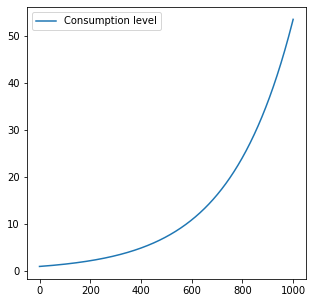

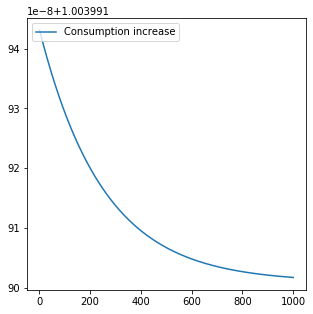

In [25]:
#Solution
periods= np.linspace(0,1000,1000)
cons_level = np.mean(Exercise_agent.cNrmNow_hist[0:1000], axis = 1)
increase_cons = cons_level[1:1000]/cons_level[0:999]

plt.figure(figsize=(5,5))
plt.plot(periods,cons_level,label='Consumption level')
plt.legend(loc=2)
plt.show()

plt.figure(figsize=(5,5))
plt.plot(periods[1:1000],increase_cons,label='Consumption increase')
plt.legend(loc=2)
plt.show()


# PART II: advanced methods for the perfect foresight agent

In this part we focus on more complicated cases of the deterministic agent model.

In the previous example survival probability (in the code **LivPrb**) and income increase factor (in the code **PermGroFac**) were stable and set to 1. However, if you want to build deterministic life-cycle model you need to add a age-dependent survival probability or income growth. Consumer problem in this setting is:
\begin{eqnarray*}
V_t(M_t,Y_t) &=& \max_{C_t}~U(C_t) + \beta \pi_t V_{t+1}(M_{t+1},Y_{t+1}), \\
& s.t. & \\
%A_t &=& M_t - C_t, \\
M_{t+1} &=& R (M_{t}-C_{t}) + Y_{t+1}, \\
Y_{t+1} &=& \Gamma_{t+1} Y_t, \\
\end{eqnarray*}

Where $Y_t$ is an age-dependent income, $\pi_t$ is a survival  probability and $\Gamma_{t+1}$ is an income growth rate. Also $\pi_{T+1} =0$ 

To solve this problem we need to study **cycles** parameter more carefully.


## Cycles and time-dependent parameters 

**cycles** parameter has more general usage than it was presented in the previous example. In general it tells HARK **how many times the one period consumer's problem need to be solved with the given set of time-changing paramters**. In our microeconomic case these parameters are **LivPrb** and **PermGroFac**, as the discount factor, the CRRA parameter and risk free interest rate are assumed to be stable.   

For the life cycle model, **the survival probabilities and income growth rates are different in each period** and consumer **never faces the same parameter's combination**. Thus in the HARK implementation, you need to set cycles = 1. To set the length    of the lifespan, you simply need to specify the survival probabilities and the income growth vectors, with T+1 non-zero values.      

For example, we create an agent-type object with with maximal lifespan set to 11, and decreasing survival probability and inverse u-shaped income dynamics:

In [26]:
LifeCycle_dictionary = {
    'CRRA' : 2.0,
    'Rfree' : 1.03,
    'DiscFac' : 0.96,
    'LivPrb' : [0.99,0.98,0.97,0.96,0.95,0.94,0.93,0.92,0.91,0.90],
    'PermGroFac' : [1.01,1.01,1.01,1.02,1.02,1.03,1.02,0.99,0.98,0.96],
    'cycles' : 1,
}

LC_agent = PerfForesightConsumerType(**LifeCycle_dictionary)

